<a href="https://colab.research.google.com/github/jadsoncastro/IA-codigos-disciplina/blob/main/Apresentacao-disciplina/Gabarito_combustivel_flex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gabarito (Controle combustível)

**Implementação de um agente inteligente para controle de combustível de um carro flex**

## Importando as bibliotecas necessárias para a execução do código

In [ ]:
from random import *
import matplotlib.pyplot as plt
import numpy as np

## Definição do ambiente

Vamos armazenar no ambiente a seguinte informação:

* Informação do dia
* Valor do estoque de combustivel
* Históricos do preço da gasolina
* Históricos do preço do álcool
* Históricos do volume do tanque de combustível 
* Preço da gasolina em cada um dos dias da série
* Preço do alcool em cada um dos dias da série


In [ ]:
# Definicao da classe ambiente
class Ambiente():
  
  def __init__(self):
    # Ambiente explodado pelo agente de compra de combistível
    self.num_dias = 0
    self.estoque = 40 # valor do estoque inicial em litros
    self.historico_preco_gasolina = [7.917]
    self.historico_preco_etanol = [5.084]
    self.historico_estoque = [self.estoque]
    self.historico_qtde_comprados_gasolina = [0]
    self.historico_qtde_comprados_etanol = [0]

  def percebe_preco_atual_gasolina(self):
    return self.historico_preco_gasolina[len(self.historico_preco_gasolina)-1]
  
  def percebe_preco_atual_etanol(self):
    return self.historico_preco_etanol[len(self.historico_preco_etanol)-1]

  def percebe_estoque(self):
    return self.historico_estoque[len(self.historico_estoque)-1]

  def run(self, dic_acoes, combustivel):
    '''
      Realizar alteração no ambiente:
      * Definir, aleatoriamente, uma quantidae de litros consumidos pelo automóvel
      * Atualizar o histórico do preço atual da gasolina
      * Atualizar o histórico do preço atual do etanol
      * Atualizar o histórico do estoque

      Essas informações serão utilizadas pelo agente para decidir a compra ou não do
      combustível e qual combustível comprar.  
    '''

    # Consumo realizado (valores gerados aleatóriamente)
    qtde_litros_consumidos = randint(0, self.historico_estoque[len(self.historico_estoque)-1])
    estoque_atual = self.historico_estoque[len(self.historico_estoque)-1] - qtde_litros_consumidos + dic_acoes["comprar"]
    self.historico_estoque.append(estoque_atual)
    
    if combustivel == 'gasolina':
      self.historico_qtde_comprados_gasolina.append(dic_acoes["comprar"])
      self.historico_qtde_comprados_etanol.append(0)
    else:
      self.historico_qtde_comprados_etanol.append(dic_acoes["comprar"])  
      self.historico_qtde_comprados_gasolina.append(0)

    
    # Informando valor da gasolina e do etanol no periodo (Atualização para o proximo dia)
    # Para os dois casos, gero um numero aleatorio entre -0.5 e 0.5. O preço da gasolina pode aumentar ou diminuir no próximo dia
    # -- Gasolina
    valor_gasolina = self.historico_preco_gasolina[len(self.historico_preco_gasolina)-1] + uniform(-0.5, 0.5)
    self.historico_preco_gasolina.append(valor_gasolina)
    
    # -- Etanol
    valor_etanol = self.historico_preco_etanol[len(self.historico_preco_etanol)-1] + uniform(-0.5, 0.5)
    self.historico_preco_etanol.append(valor_etanol)


## Definição do agente 

O agente vai armazenar informações sobre:

* Ambiente (Composição de classes)
* Valor médio dos consumos de combustíveis
* Informação do último valor do combustível
* Informação sobre o estoque atual do tanque do automóvel

In [ ]:
# Definição da classe agente

class Agente():

  def __init__(self, ambiente):
    self.num_dias = 1
    self.ambiente = ambiente
    self.estoque = ambiente.percebe_estoque()
    self.total_gasto = 0
    self.preco_atual_gasolina = self.media_gasolina = ambiente.percebe_preco_atual_gasolina()
    self.preco_atual_etanol = self.media_etanol = ambiente.percebe_preco_atual_etanol()
    self.tipo_combustivel = ''
    self.capacidade = 40

  def executa_agente(self, qtde_dias=30):
    
    for i in range(qtde_dias):
      # O agente percebe o estado do ambiente
      self.estoque = self.ambiente.percebe_estoque()
      self.preco_atual_gasolina = self.ambiente.percebe_preco_atual_gasolina()
      self.preco_atual_etanol = self.ambiente.percebe_preco_atual_etanol()

      '''
        Controlador do agente: Define a regra para comprar o combustível
      '''

      # Se o preço do etanol valer mais a pena que o da gasolina
      if self.preco_atual_etanol < self.preco_atual_gasolina*0.7:
        
        self.tipo_combustivel = 'etanol'
        
        if self.preco_atual_etanol < 0.8 * self.media_etanol and self.estoque < self.capacidade:
          compra = self.capacidade - self.estoque
        elif self.estoque < 10:
          compra = 10 
        else:
          compra = 0

        #Fim do controlador
        self.total_gasto += self.preco_atual_etanol*compra
        
      # Se o preço da gasolina valer mais a pena que o do etanol  
      else:
        self.tipo_combustivel = 'gasolina'
        
        if self.preco_atual_gasolina < 0.8 * self.media_gasolina and self.estoque < self.capacidade:
          compra = self.capacidade - self.estoque
        elif self.estoque < 10:
          compra = 10 
        else:
          compra = 0  
        
        #Fim do controlador
        self.total_gasto += self.preco_atual_gasolina * compra
    

      #O agente aplica modificações ao ambiente
      self.ambiente.run({"comprar": compra}, self.tipo_combustivel)
      
       
      self.num_dias+=1
      self.media_gasolina = (self.media_gasolina*(self.num_dias-1) + self.preco_atual_gasolina)/self.num_dias
      self.media_etanol = (self.media_etanol*(self.num_dias-1) + self.preco_atual_etanol)/self.num_dias
      

## Definindo classe para impressão dos resultados

In [ ]:
class Imprime():
  def imprime_resultados(agente):
    historico_dias = np.linspace(0, agente.num_dias, agente.num_dias)

    # Primeira Impressão:
    # *Historico de preco gasolina
    plt.plot(historico_dias, agente.ambiente.historico_preco_gasolina, 'bo--', label='Histórico Gasolina (preço)')
    plt.legend()
    plt.show()

    # *Historico de preco etanol
    plt.plot(historico_dias, agente.ambiente.historico_preco_etanol, 'rx--', label='Histórico Etanol (preço)')
    plt.legend()
    plt.show()

    #Segunda Impressão:
    # * Historico quantidade de litros comprados de Gasolina
    fig, ax = plt.subplots()
    ax.vlines(historico_dias, ymin=0, ymax=agente.ambiente.historico_qtde_comprados_gasolina)
    ax.plot(historico_dias, agente.ambiente.historico_qtde_comprados_gasolina, "go", label="Historico litros comprados (gasolina)")
    ax.set_ylim(0, 100)
    ax.legend()
    plt.show()

    # * Historico quantidade de litros comprados de Etanol
    fig, ax = plt.subplots()
    ax.vlines(historico_dias, ymin=0, ymax=agente.ambiente.historico_qtde_comprados_etanol)
    ax.plot(historico_dias, agente.ambiente.historico_qtde_comprados_etanol, "bo", label="Histórico de litros comprados (etanol)")
    ax.set_ylim(0, 100)
    ax.legend()
    plt.show()

    #Terceira impressão: Histórico de Estoque
    plt.plot(historico_dias, agente.ambiente.historico_estoque, 'rD--', label='Histórico Estoque (litros)')
    plt.legend()
    plt.show()



## Execução do problema

Por um determinado número de iterações, no caso 30 dias, vamos gerar números aleatórios para o preço da gasolina e do etanol e a quantidade de produtos consumidos.

In [ ]:
ambiente_atuacao = Ambiente()
controlador_abastecimento = Agente(ambiente_atuacao)
controlador_abastecimento.executa_agente(30)

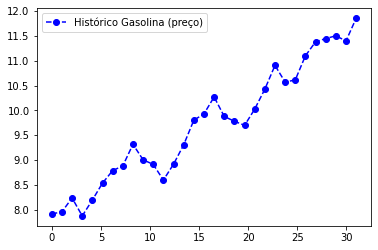

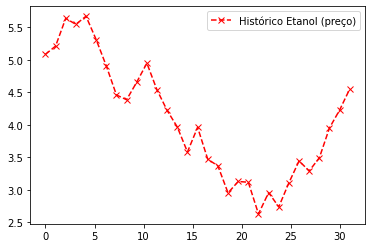

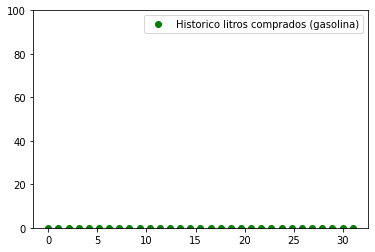

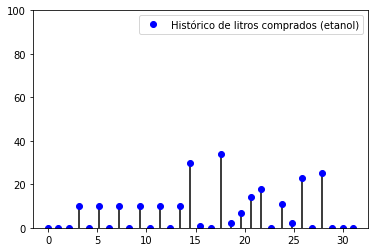

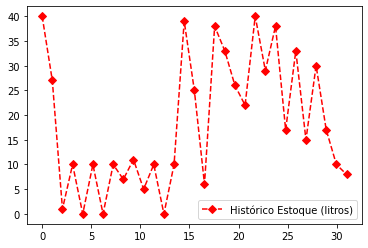

In [ ]:
Imprime.imprime_resultados(controlador_abastecimento)